In [118]:
%cd /mnt/Zika_subgenomic_plotting/plotting/positive_start/

/mnt/Zika_subgenomic_plotting/plotting/positive_start


In [119]:
depth = pd.read_csv("ERR1802073.tsv", sep="\t", names=["Position", "Count"])
depth.set_index("Position", inplace=True)

count = depth['Count'].values

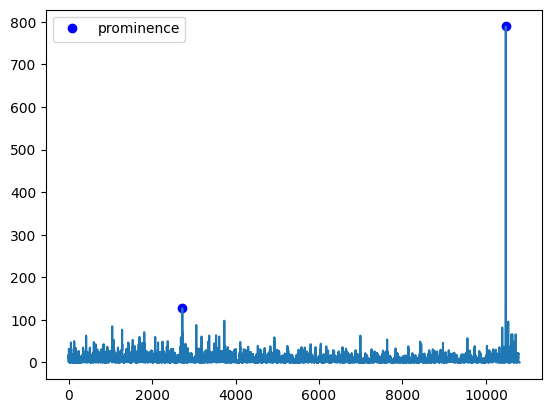

In [120]:
peaks, _ = find_peaks(count, prominence=100, distance=20)      # BEST!
plt.plot(peaks, count[peaks], "ob")
plt.plot(count)
plt.legend(['prominence'])
plt.show()

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.gridspec as gridspec
from scipy.signal import find_peaks
import ruptures as rpt

In [3]:
acc_list=["ERR1802073",
"ERR1802074",
"SRR12615449",
"SRR12615452",
"SRR12615453",
"SRR12615466",
"SRR12615469",
"SRR12615470",
"SRR15923994"]

false_list=["ERR1802071",
"ERR1802079",
"SRR15923995",
"SRR15923996",
"SRR8155998",
"SRR8155999",
"SRR8156000",
"SRR9106110",
"SRR9971533",
"SRR9971534",
"SRR9971537",
"SRR9971538",
"SRR9971539",
"SRR9971540"]

In [4]:
%cd /mnt/Zika_subgenomic_plotting/plotting/

/mnt/Zika_subgenomic_plotting/plotting


In [5]:
reference_virus = {"ERR1802071":"Zika virus (Brazil strain)",
"ERR1802073":"Zika virus (Brazil strain)",
"ERR1802074":"Zika virus (Brazil strain)",
"ERR1802079":"Zika virus (Brazil strain)",
"SRR15923994":"Zika virus (Uganda strain)",
"SRR15923995":"Zika virus (Uganda strain)",
"SRR15923996":"Zika virus (Uganda strain)",
"SRR8155998":"Zika virus (Brazil strain)",
"SRR8155999":"Zika virus (Uganda strain)",
"SRR8156000":"Zika virus (Brazil strain)",
"SRR9971533":"Zika virus (Brazil strain)",
"SRR9971534":"Zika virus (Brazil strain)",
"SRR9971537":"Zika virus (Brazil strain)",
"SRR9971538":"Zika virus (Brazil strain)",
"SRR9971539":"Zika virus (Brazil strain)",
"SRR9971540":"Zika virus (Brazil strain)",
"SRR9106110":"Zika virus (Brazil strain)",
"SRR12615453":"Zika virus (Brazil strain)",
"SRR12615452":"Zika virus (Brazil strain)",
"SRR12615466":"Zika virus (Brazil strain)",
"SRR12615449":"Zika virus (Brazil strain)",
"SRR12615470":"Zika virus (Brazil strain)",
"SRR12615469":"Zika virus (Brazil strain)"}

Ended up going for simple top 5 peaks approach

## All plots

In [ ]:
for acc in acc_list:
    
    original_depth = pd.read_csv("original_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    positive_depth = pd.read_csv("positive_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    negative_depth = pd.read_csv("negative_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    positive_start = pd.read_csv("positive_start/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    negative_start = pd.read_csv("negative_start/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    positive_end = pd.read_csv("positive_end/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    negative_end = pd.read_csv("negative_end/" + acc + ".tsv", sep="\t", names=["Position", "Count"])

    #5' start peak detection
    positive_start2 = pd.read_csv("positive_start/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    positive_start2 = positive_start2.sort_values(by=['Count'],ascending=False)
    top5peaks = positive_start2.head(5)
    top5peaks = top5peaks.to_numpy()

    #Read coverage Change Point Detection
    depth = pd.read_csv("original_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    depth = depth.drop(columns=["Virus"])
    depth.set_index("Position", inplace=True)

    coverage = depth['Count'].values.reshape(-1,1)
    algo = rpt.Dynp(model="l2")
    algo.fit(coverage)
    result = algo.predict(n_bkps=1)
    
    
    # Create a list of the dataframes for easy iteration
    dataframes = [original_depth, positive_depth, negative_depth, positive_start, negative_start, positive_end, negative_end]
    titles = [reference_virus[acc] + " Coverage", acc + " Sense Reads Coverage",acc + " Antisense Reads Coverage",
              acc + " Sense Read 5\' End",acc + " Antisense Read 3\' End", acc + " Sense Read 3\' End", acc + " Antisense Read 5\' End"]
    colours = ["magma",None, "autumn",None,"autumn",None, "autumn"]
    
    
    
    # Create subplots: 4 rows and 2 columns, but only using the first slot for a single graph
    fig = plt.figure()
    axs = []
    gs = gridspec.GridSpec(4, 2)
    axs.append(plt.subplot(gs[0, 0]))
    axs.append(plt.subplot(gs[1, 0]))
    axs.append(plt.subplot(gs[1, 1]))
    axs.append(plt.subplot(gs[2, 0]))
    axs.append(plt.subplot(gs[2, 1]))
    axs.append(plt.subplot(gs[3, 0]))
    axs.append(plt.subplot(gs[3, 1]))
    axs.append(plt.subplot(gs[0, 1]))
    
    # Plot each DataFrame on its corresponding subplot
    for i, df in enumerate(dataframes):
        ax = axs[i]
        if i==3:
            ax.plot(top5peaks[0][0],top5peaks[0][1], "ob")
            ax.plot(top5peaks[1][0],top5peaks[1][1], "ob")
            ax.plot(top5peaks[2][0],top5peaks[2][1], "ob")
            ax.plot(top5peaks[3][0],top5peaks[3][1], "ob")
            ax.plot(top5peaks[4][0],top5peaks[4][1], "ob")
            ax.legend(['Peaks'])
        if i==0:
            ax.vlines(result[0],ymin=0,ymax=df['Count'].max(), color='red', linestyles='dashed', linewidth = 4)
            
        df.plot("Position", "Count", ax=ax, colormap=colours[i], figsize=(18, 18))
        ax.set_title(titles[i])

    axs[7].annotate("Genome Map", (0.22,0.45), fontsize=50, bbox=dict(boxstyle="round", fc="0.8"))

    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    # fig.savefig('/mnt/Zika_subgenomic_plotting/final_plots/' + acc + '.png')

## Analysis Plots only

Bottom up and window are looking like the best ones

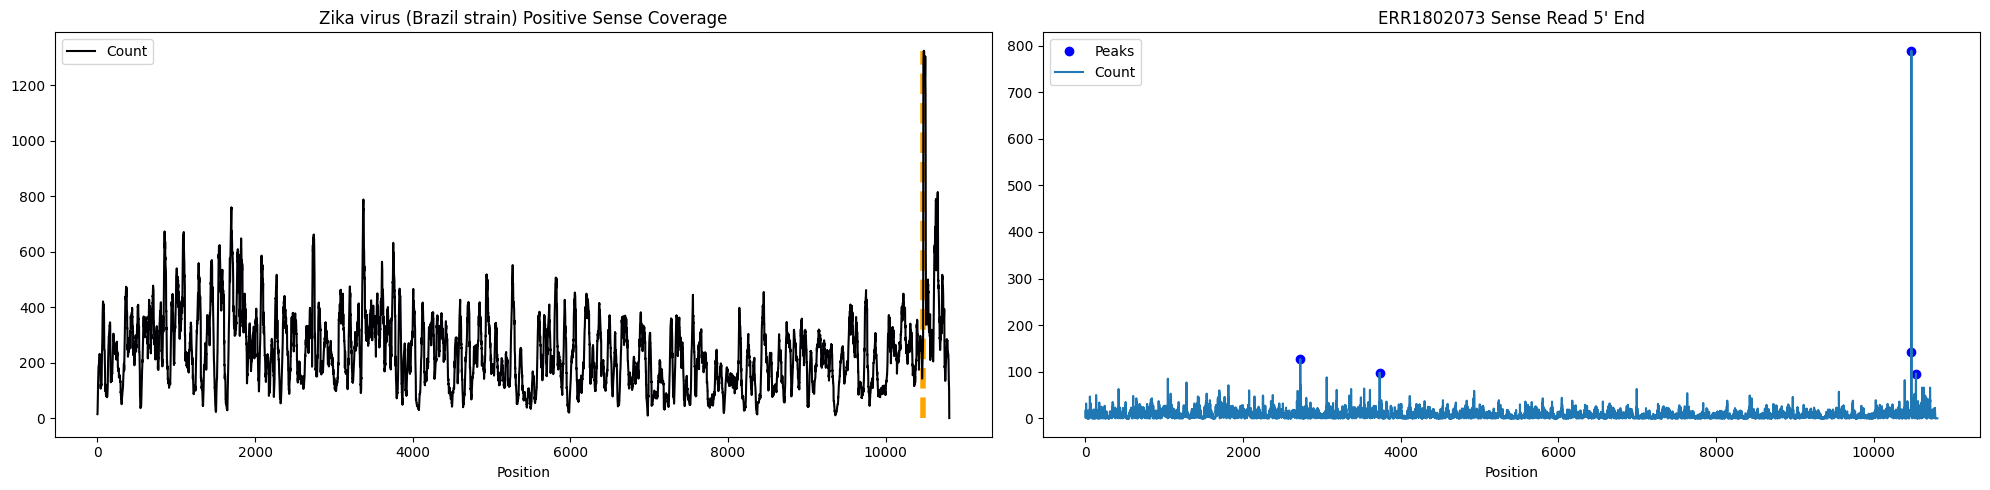

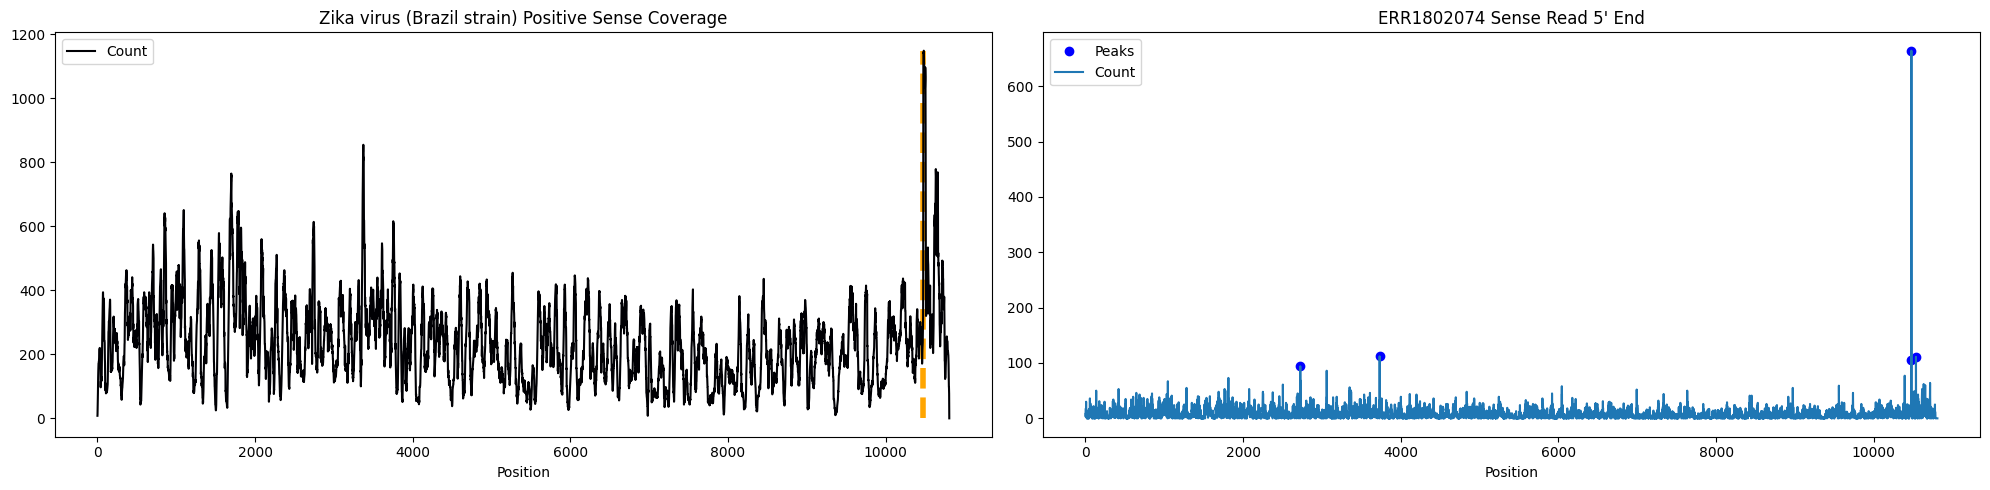

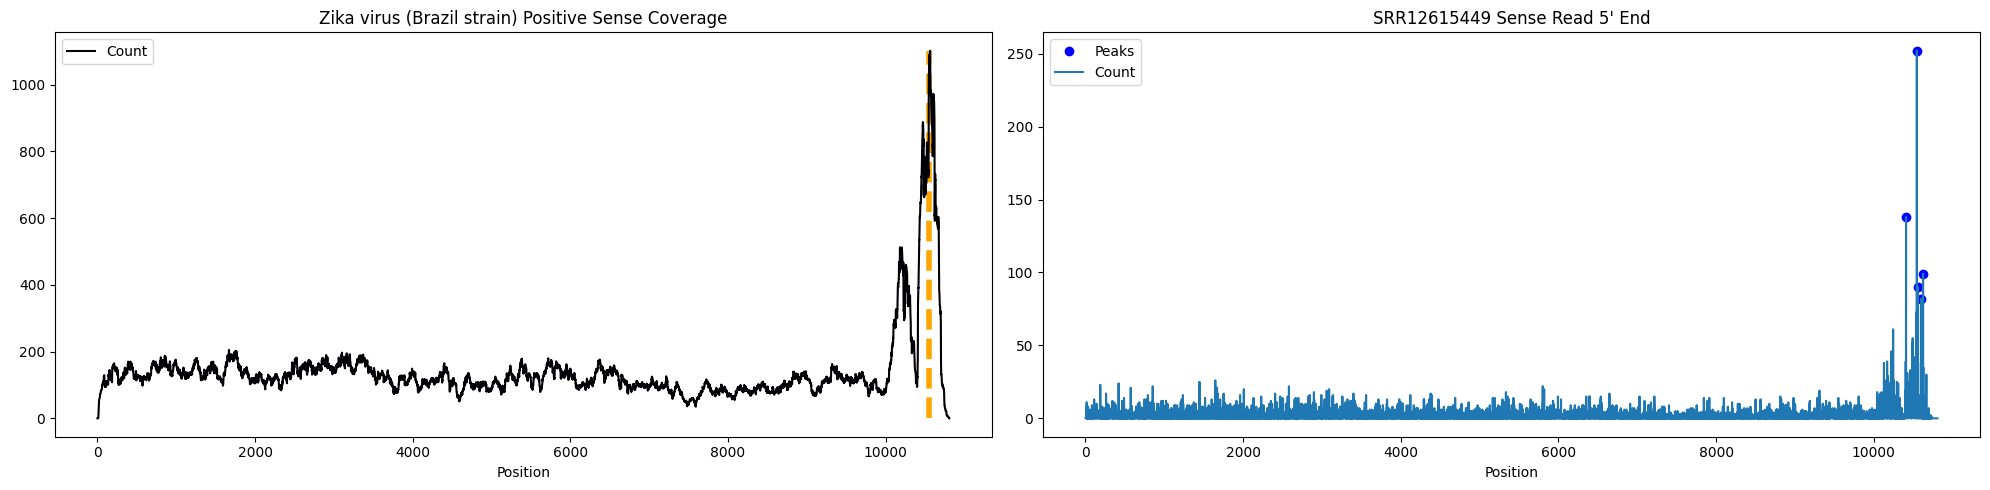

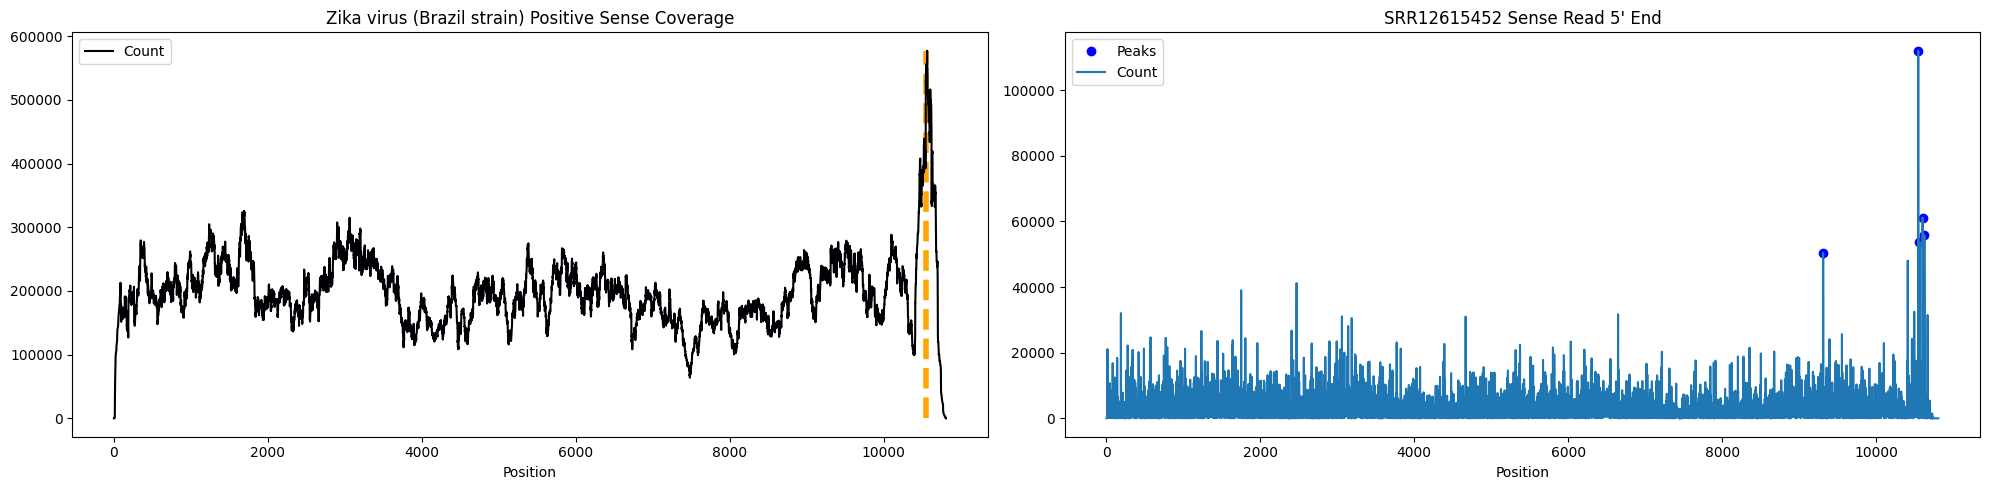

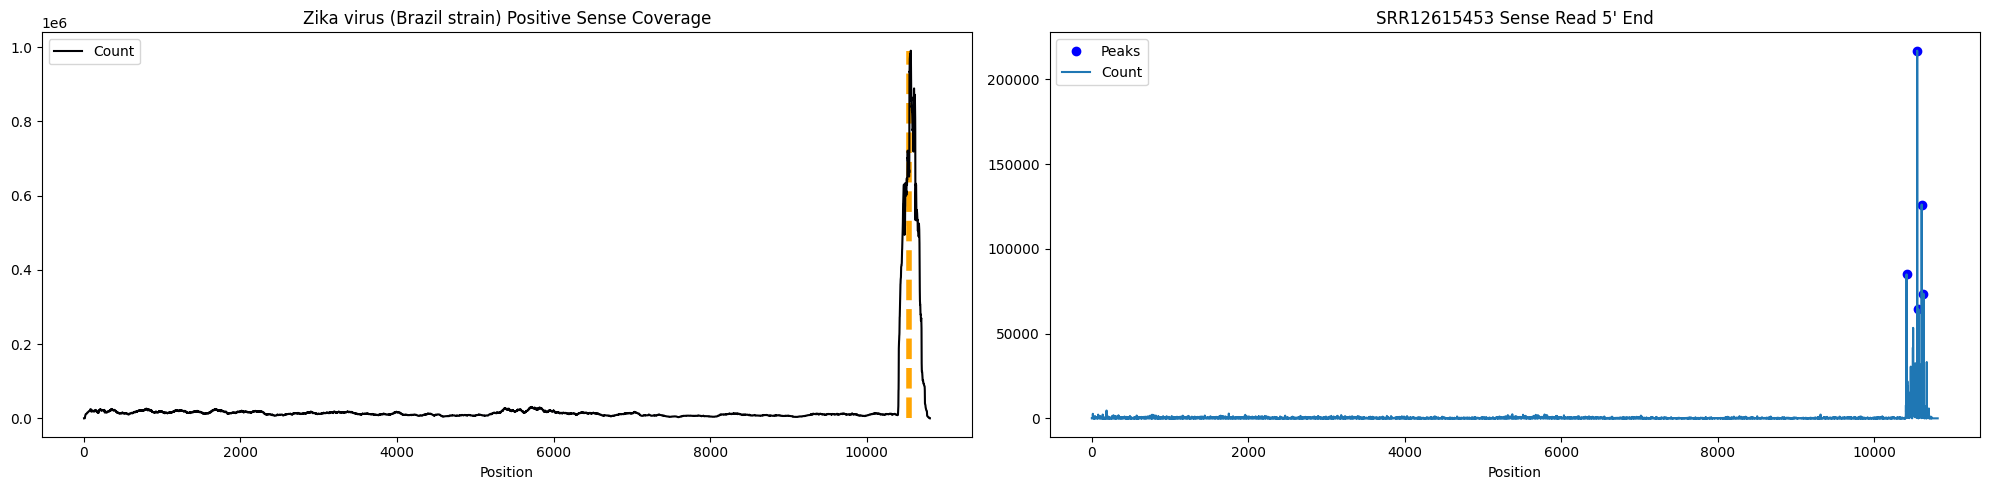

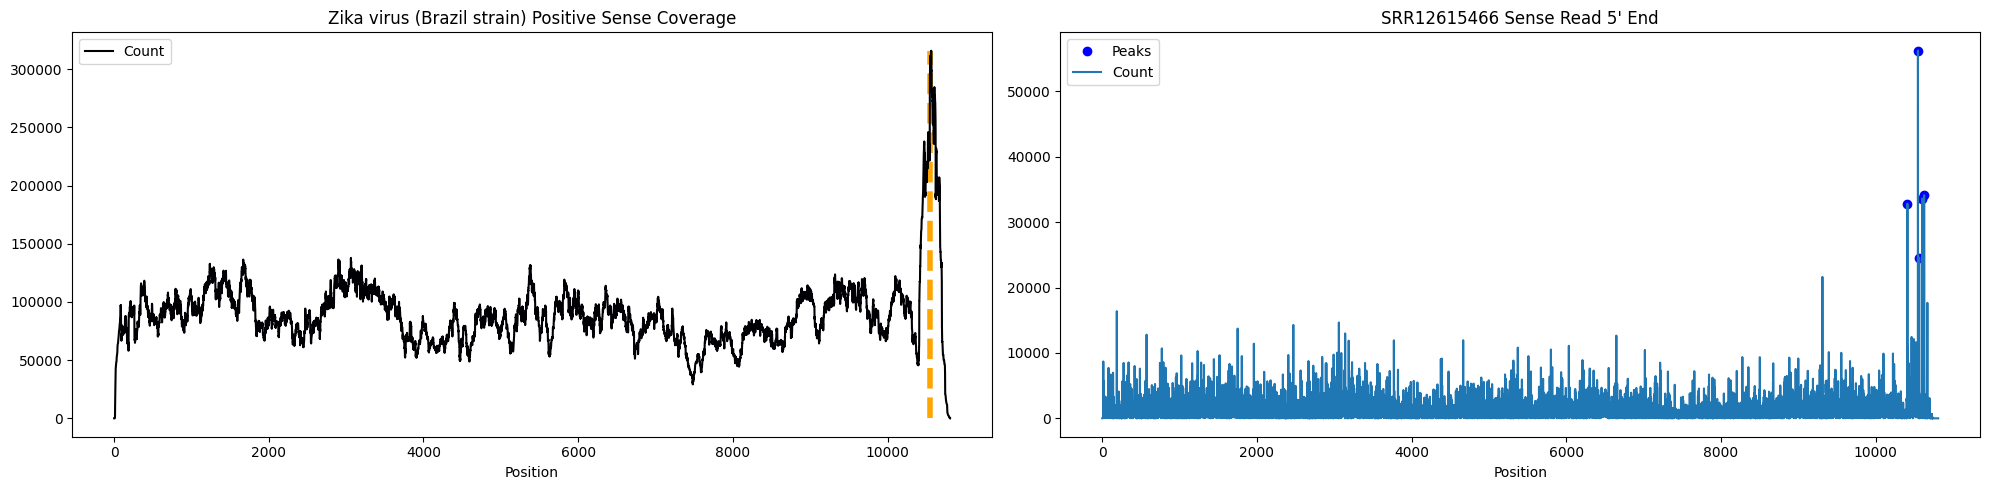

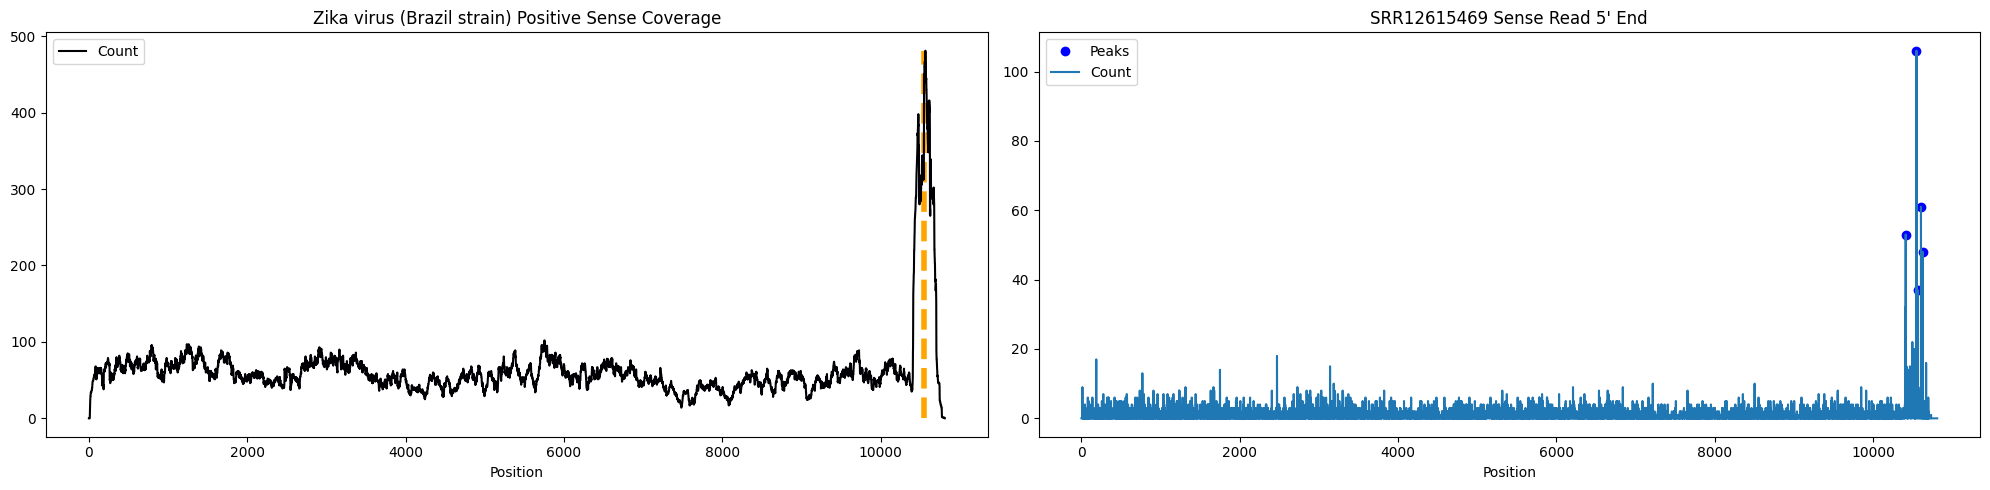

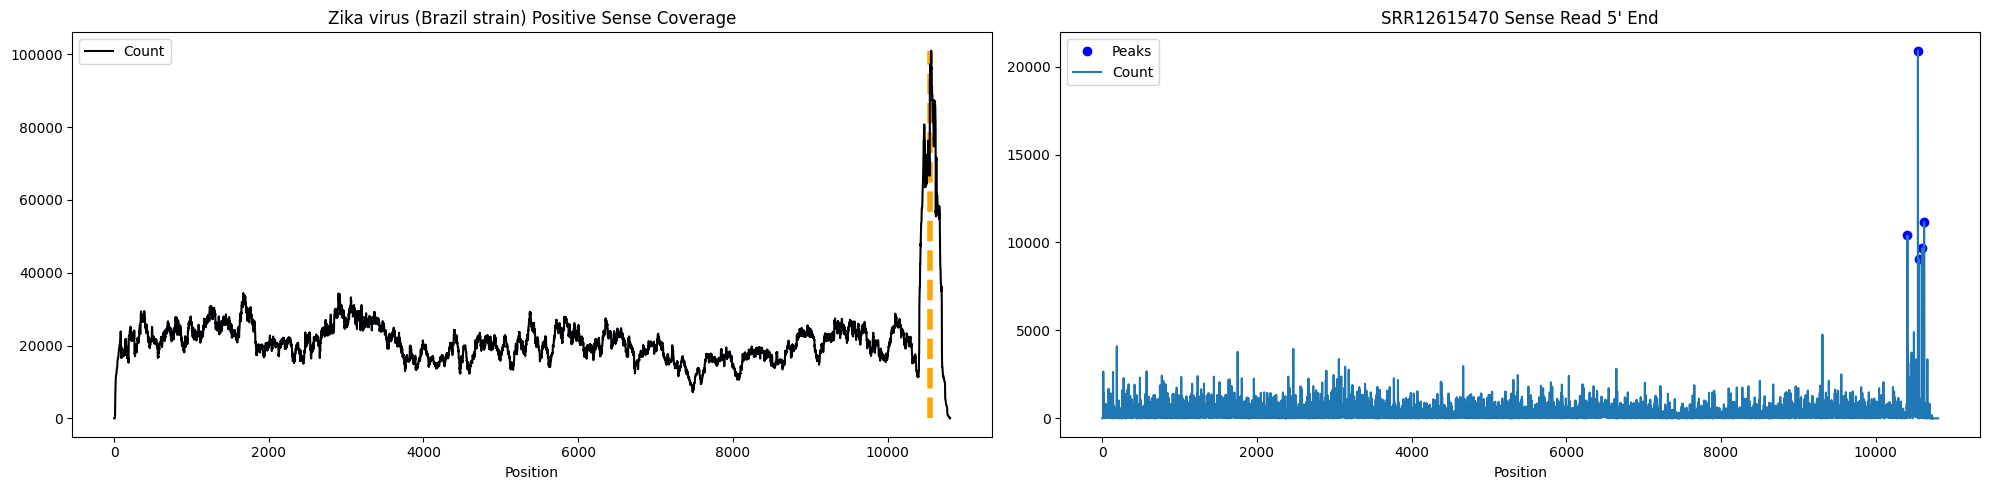

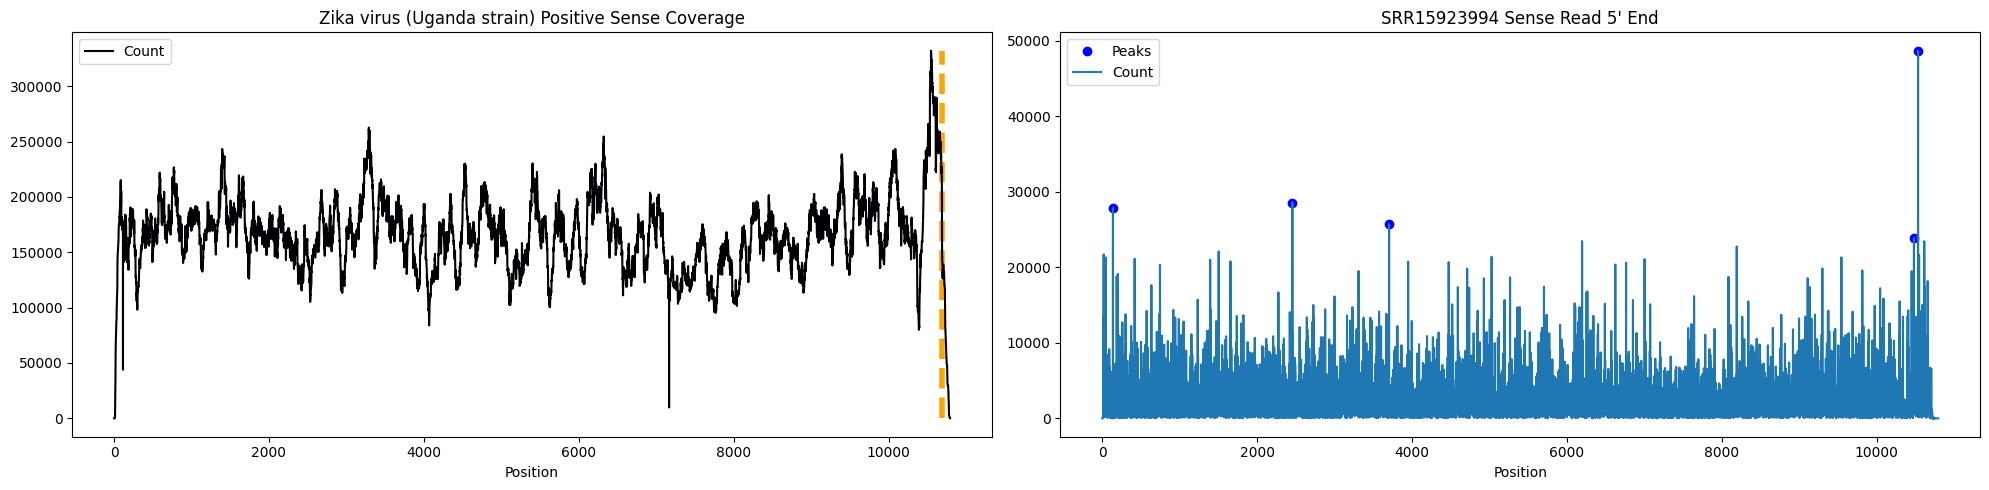

In [7]:
for acc in acc_list:
    
    # original_depth = pd.read_csv("original_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    positive_depth = pd.read_csv("positive_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    # negative_depth = pd.read_csv("negative_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    positive_start = pd.read_csv("positive_start/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    # negative_start = pd.read_csv("negative_start/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    # positive_end = pd.read_csv("positive_end/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    # negative_end = pd.read_csv("negative_end/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    
    
    #5' start peak detection
    positive_start2 = pd.read_csv("positive_start/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    positive_start2 = positive_start2.sort_values(by=['Count'],ascending=False)
    top5peaks = positive_start2.head(5)
    top5peaks = top5peaks.to_numpy()

    #Read coverage Change Point Detection
    depth = pd.read_csv("positive_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    depth = depth.drop(columns=["Virus"])
    depth.set_index("Position", inplace=True)

    coverage = depth['Count'].values.reshape(-1,1)
    algo = rpt.Window(model="l2",width=30)
    algo.fit(coverage)
    result = algo.predict(n_bkps=1)
    
    
    # Create a list of the dataframes for easy iteration
    dataframes = [positive_depth, positive_start]
    titles = [reference_virus[acc] + " Positive Sense Coverage", acc + " Sense Read 5\' End"]
    colours = ["magma",None]
    
    
    
    # Create subplots: 4 rows and 2 columns, but only using the first slot for a single graph
    fig = plt.figure()
    axs = []
    gs = gridspec.GridSpec(1, 2)
    axs.append(plt.subplot(gs[0, 0]))
    # axs.append(plt.subplot(gs[1, 0]))
    # axs.append(plt.subplot(gs[1, 1]))
    # axs.append(plt.subplot(gs[2, 0]))
    # axs.append(plt.subplot(gs[2, 1]))
    # axs.append(plt.subplot(gs[3, 0]))
    # axs.append(plt.subplot(gs[3, 1]))
    axs.append(plt.subplot(gs[0, 1]))
    
    # Plot each DataFrame on its corresponding subplot
    for i, df in enumerate(dataframes):
        ax = axs[i]
        if i==1:
            ax.plot(top5peaks[0][0],top5peaks[0][1], "ob")
            ax.plot(top5peaks[1][0],top5peaks[1][1], "ob")
            ax.plot(top5peaks[2][0],top5peaks[2][1], "ob")
            ax.plot(top5peaks[3][0],top5peaks[3][1], "ob")
            ax.plot(top5peaks[4][0],top5peaks[4][1], "ob")
            ax.legend(['Peaks'])
        if i==0:
            ax.vlines(result[0],ymin=0,ymax=df['Count'].max(), color='orange', linestyles='dashed', linewidth = 4)
            
        df.plot("Position", "Count", ax=ax, colormap=colours[i], figsize=(20, 5))
        ax.set_title(titles[i])

    # axs[7].annotate("Genome Map", (0.22,0.45), fontsize=50, bbox=dict(boxstyle="round", fc="0.8"))

    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    # fig.savefig('/mnt/Zika_subgenomic_plotting/final_plots/' + acc + '.png')

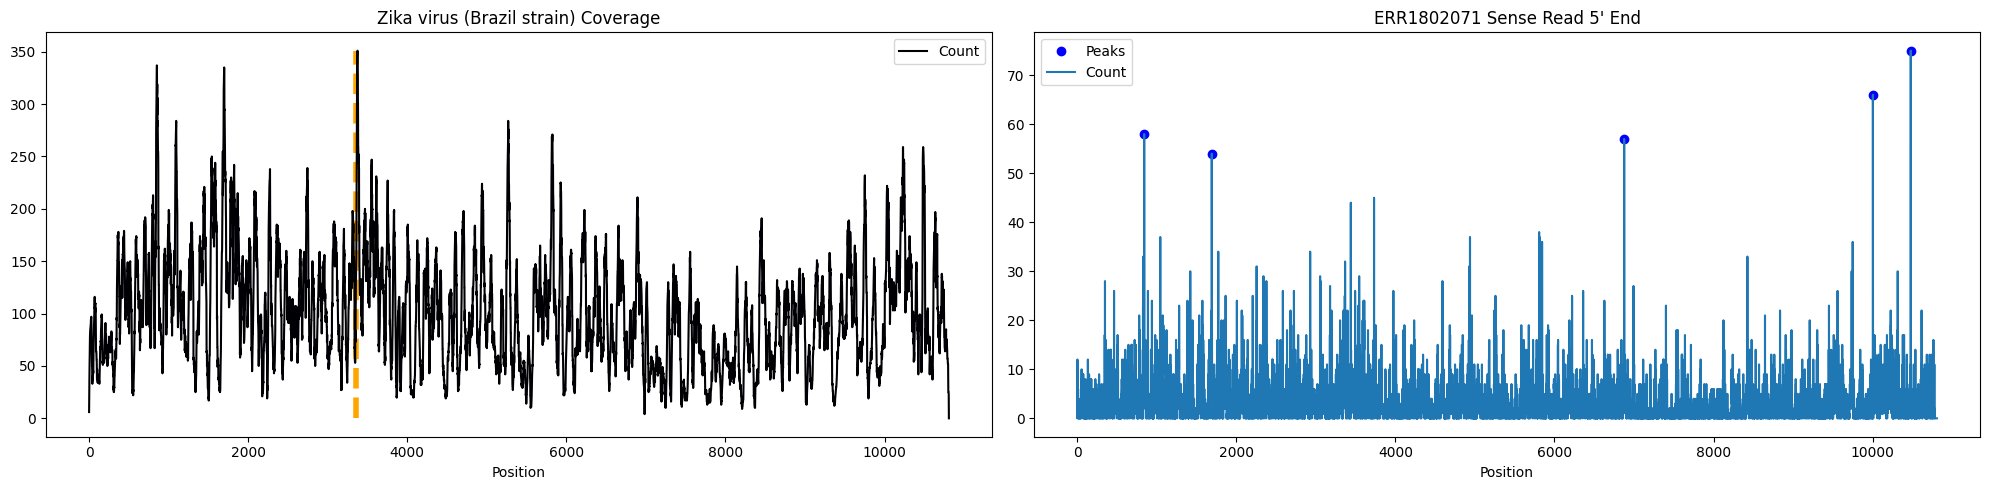

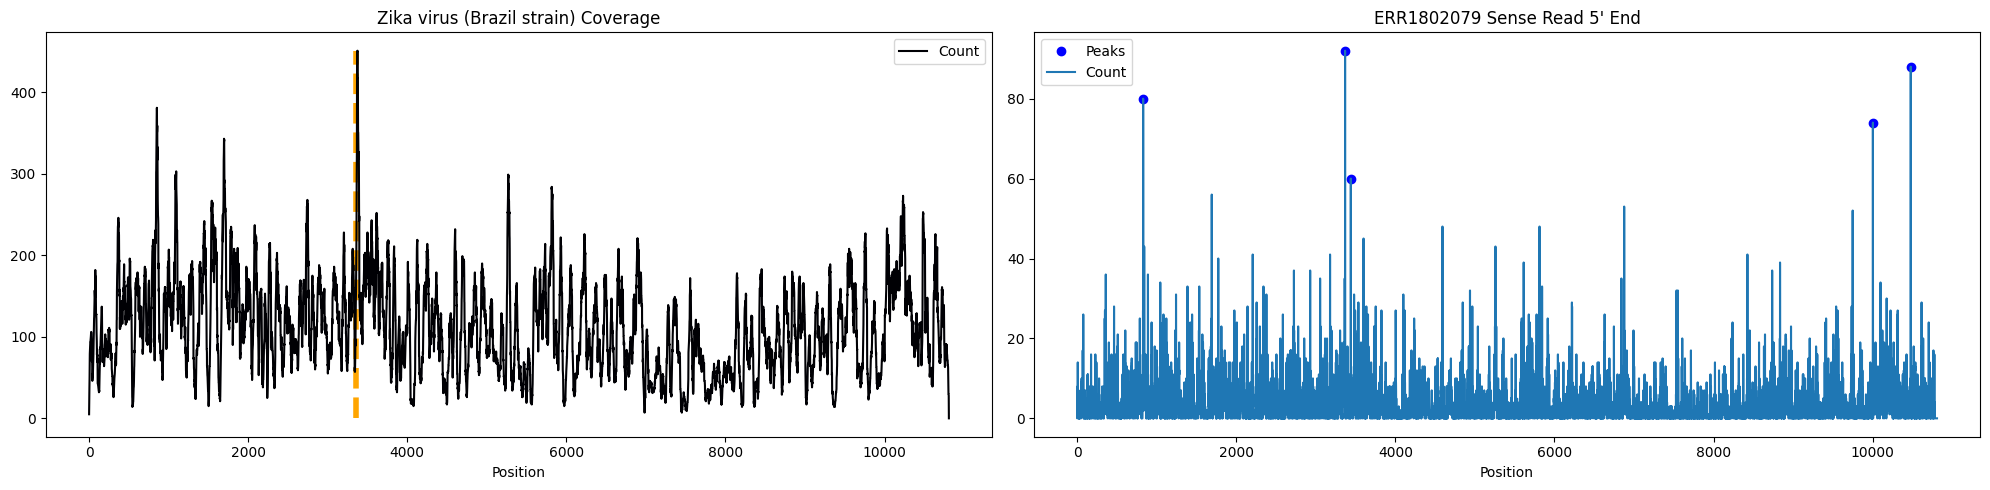

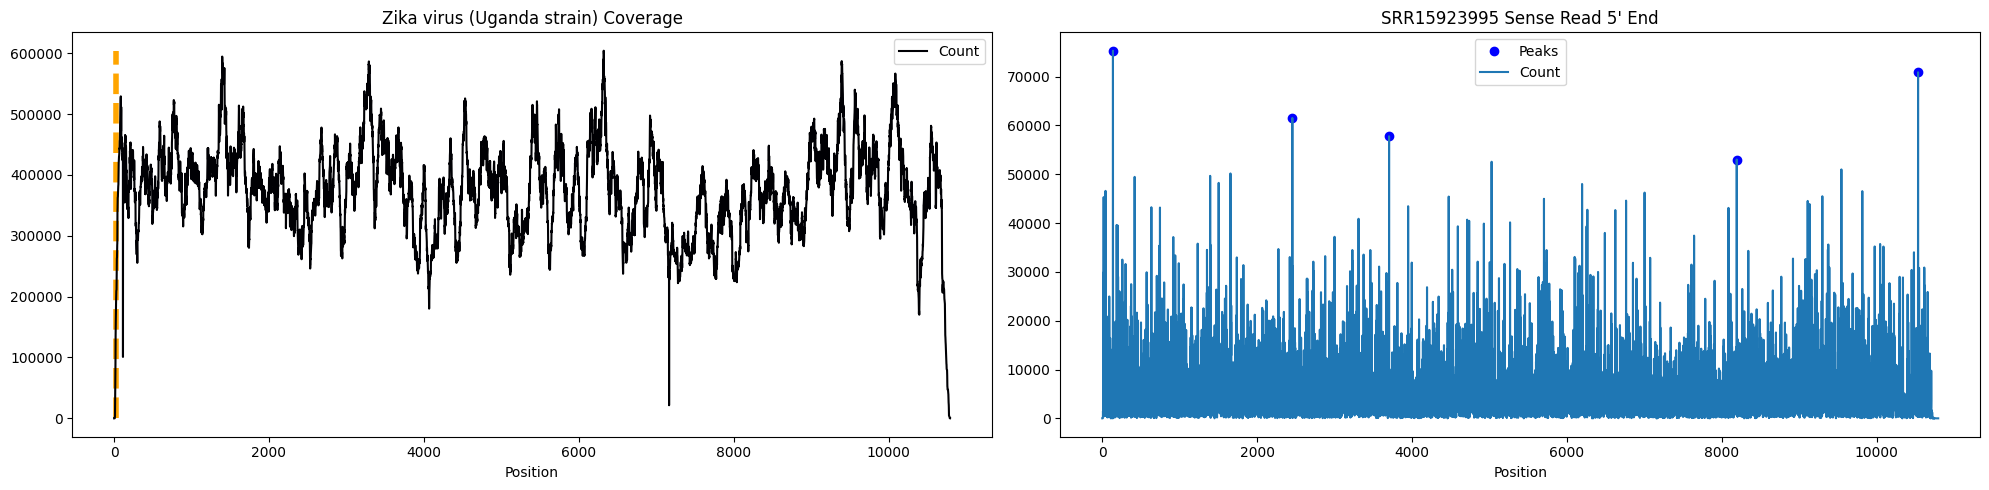

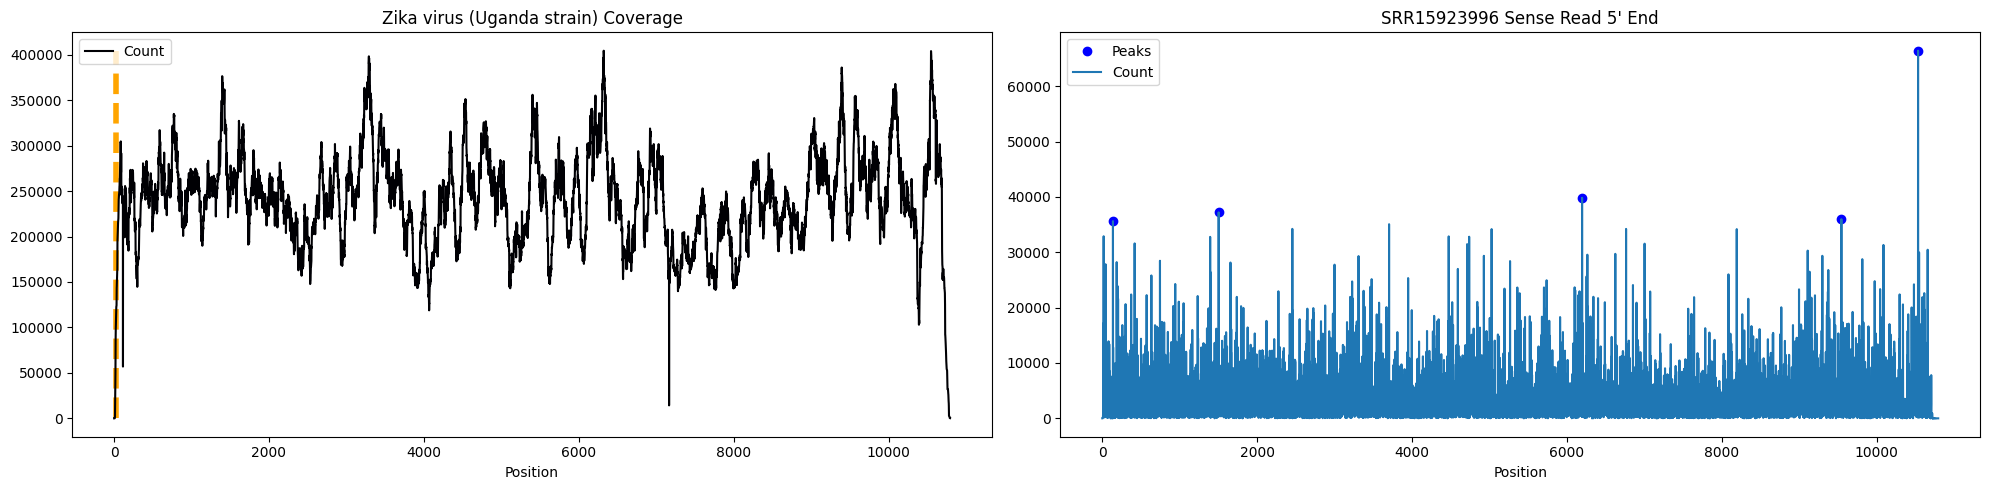

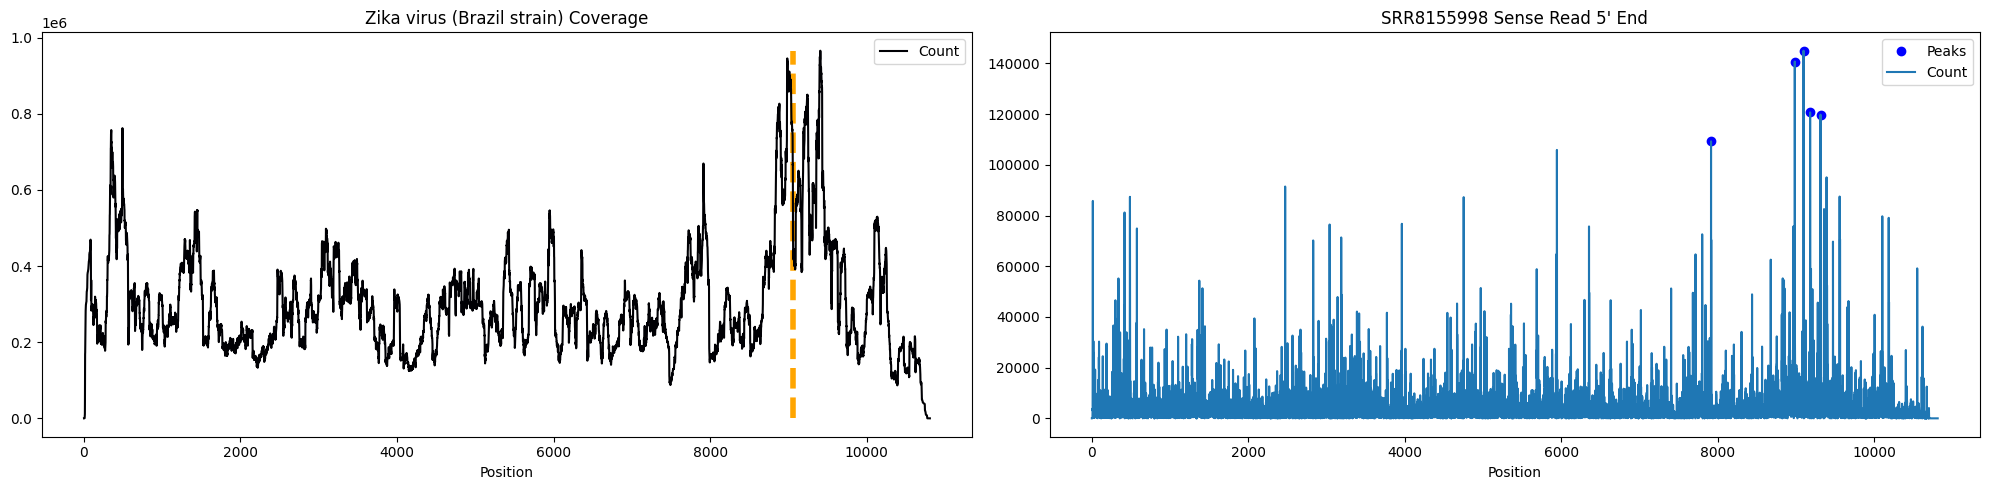

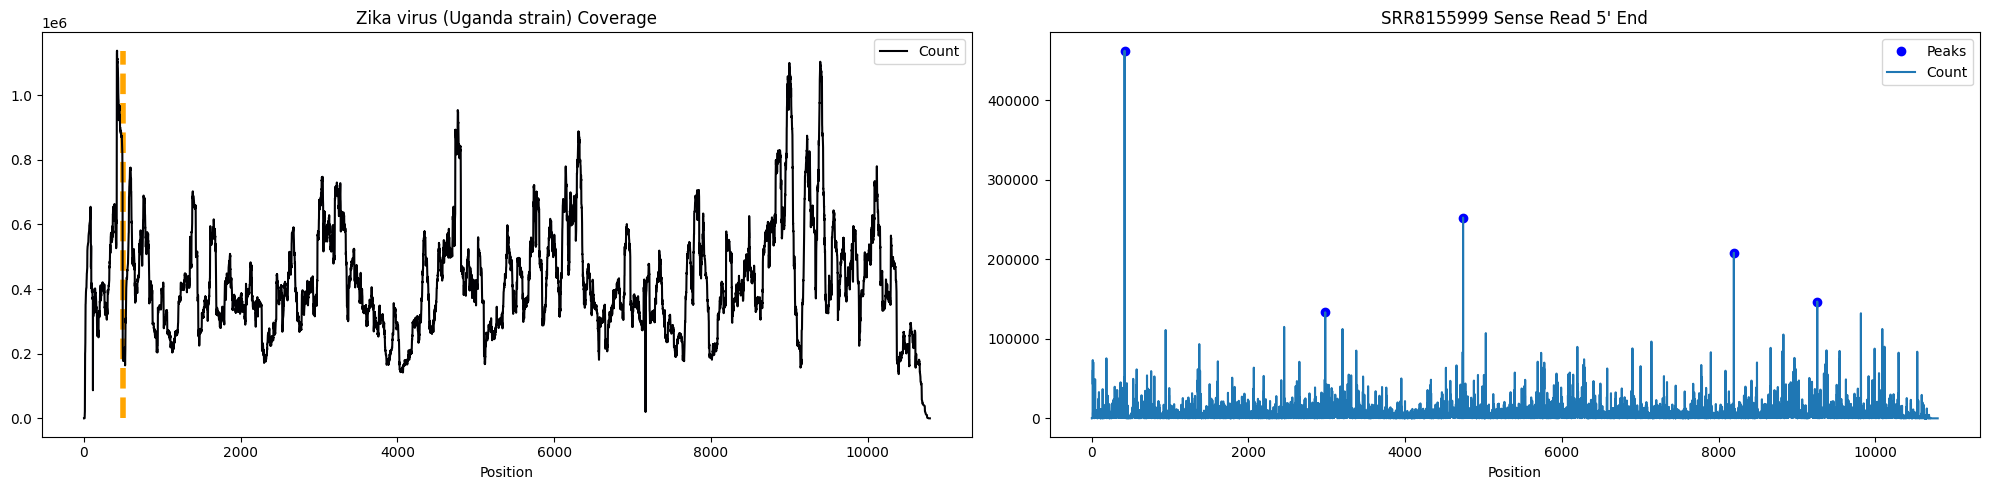

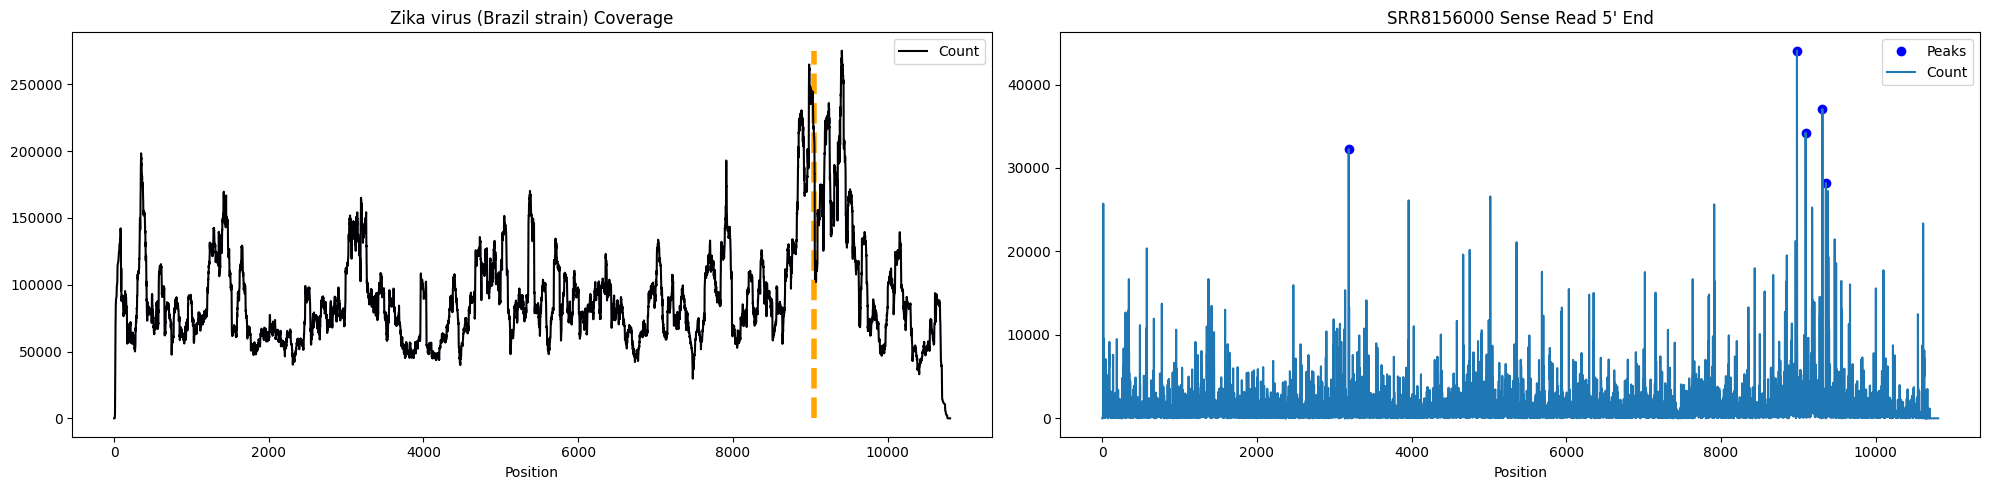

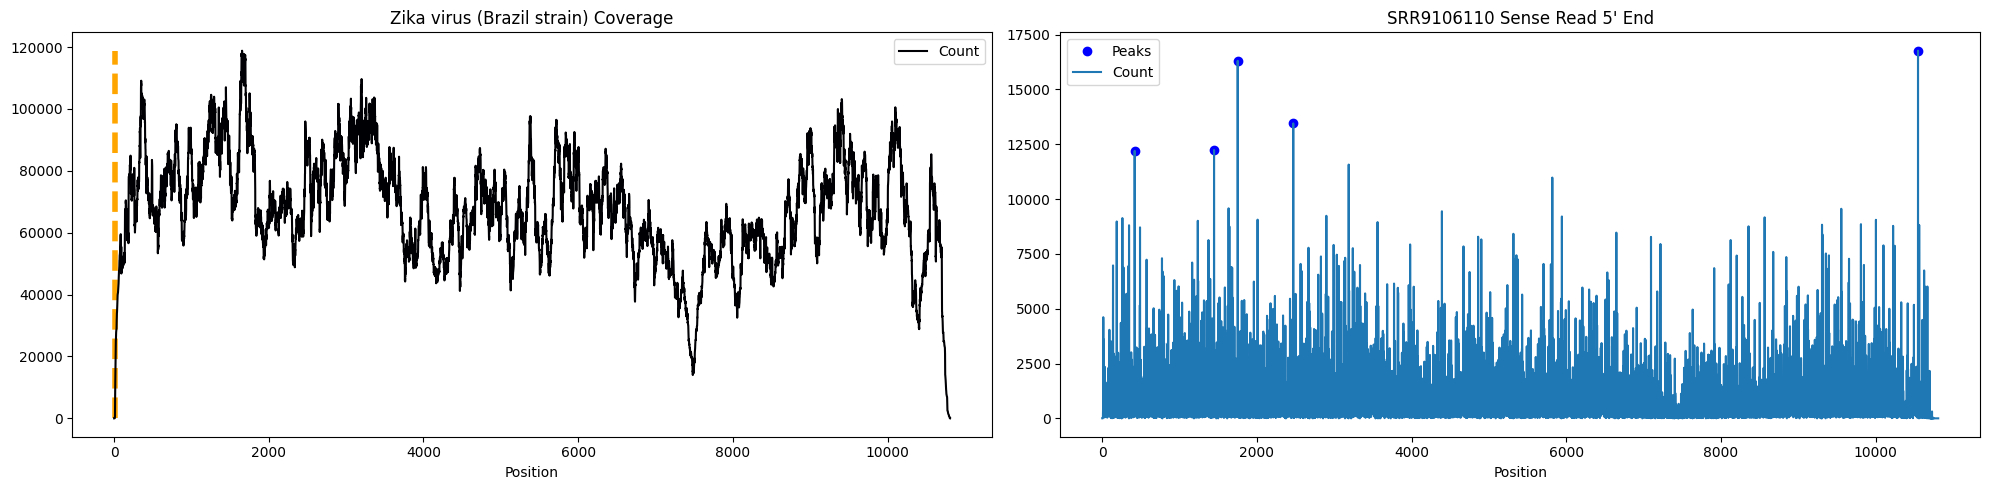

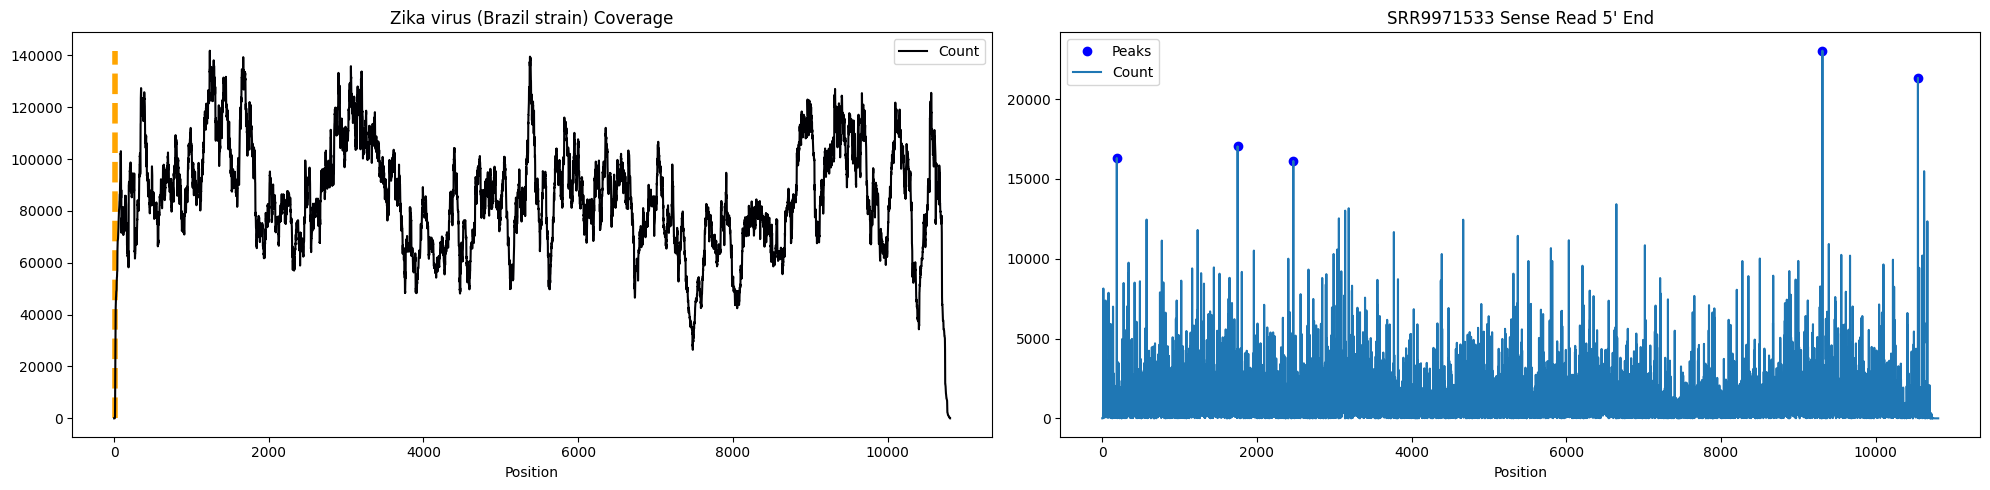

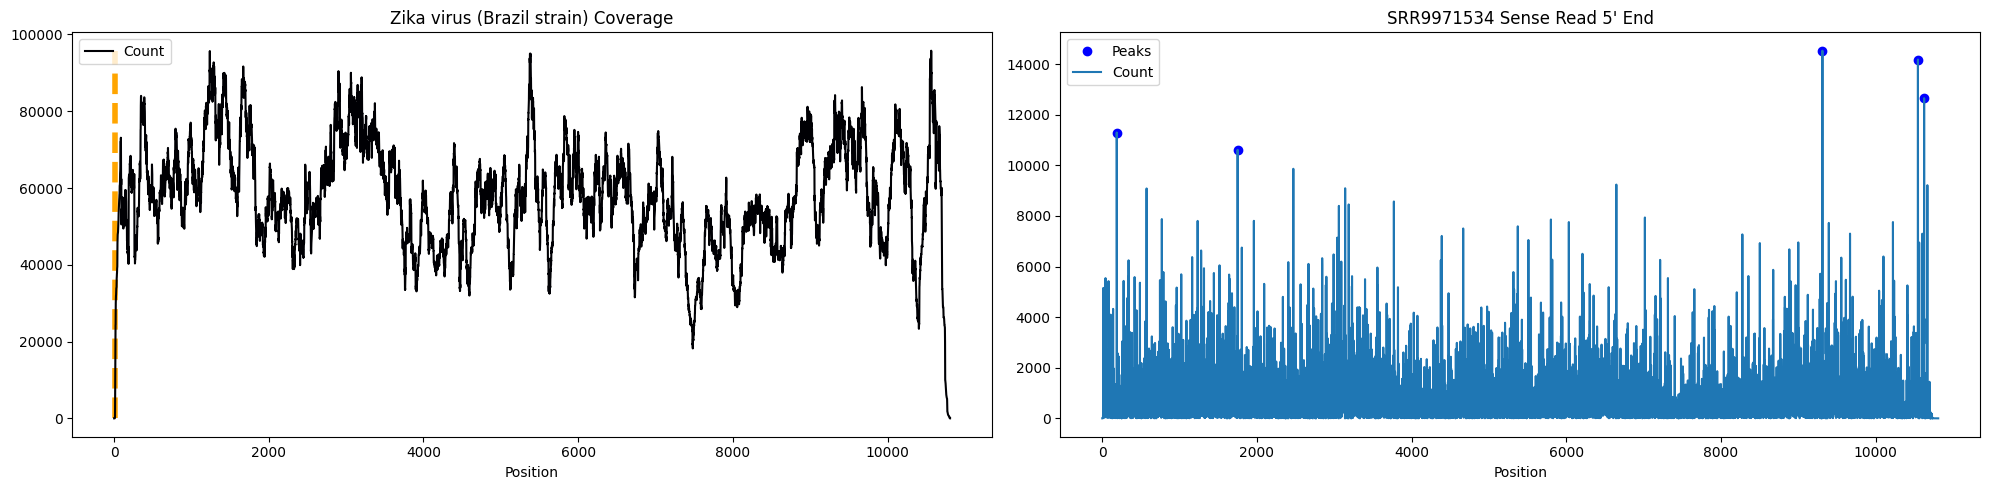

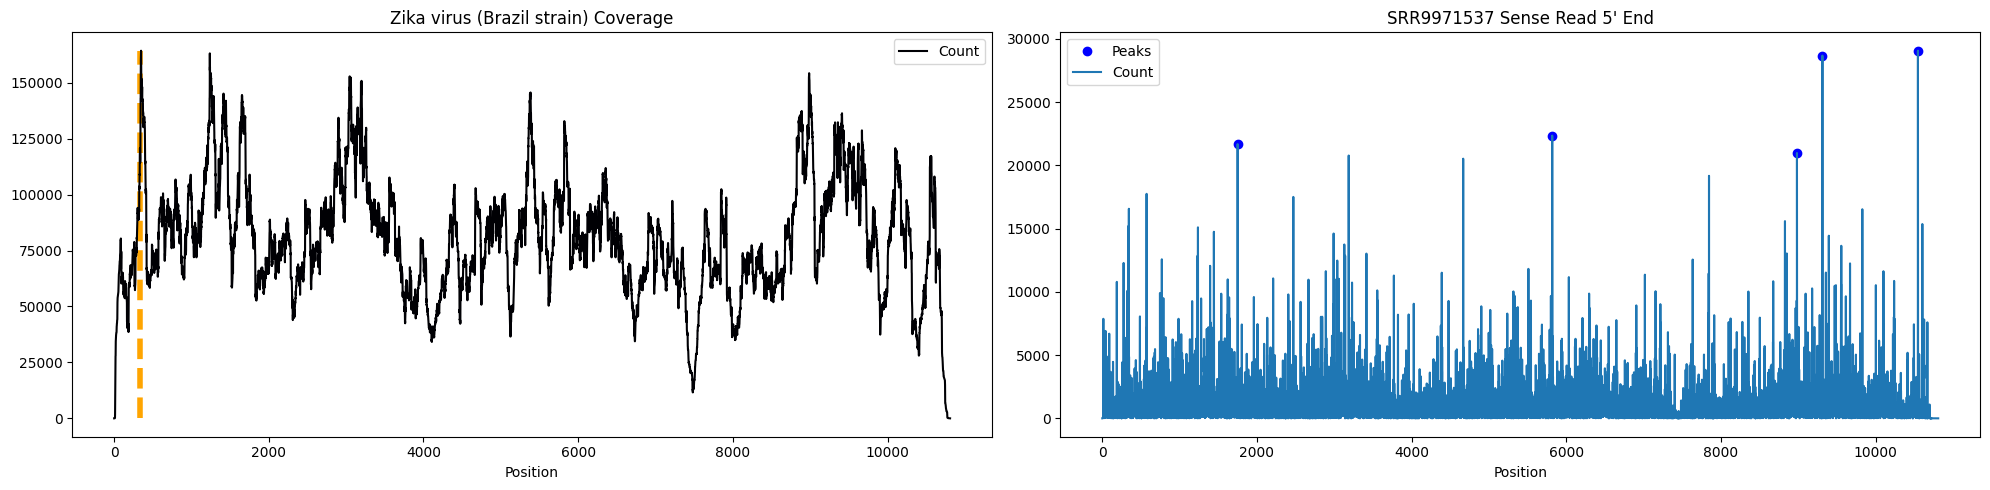

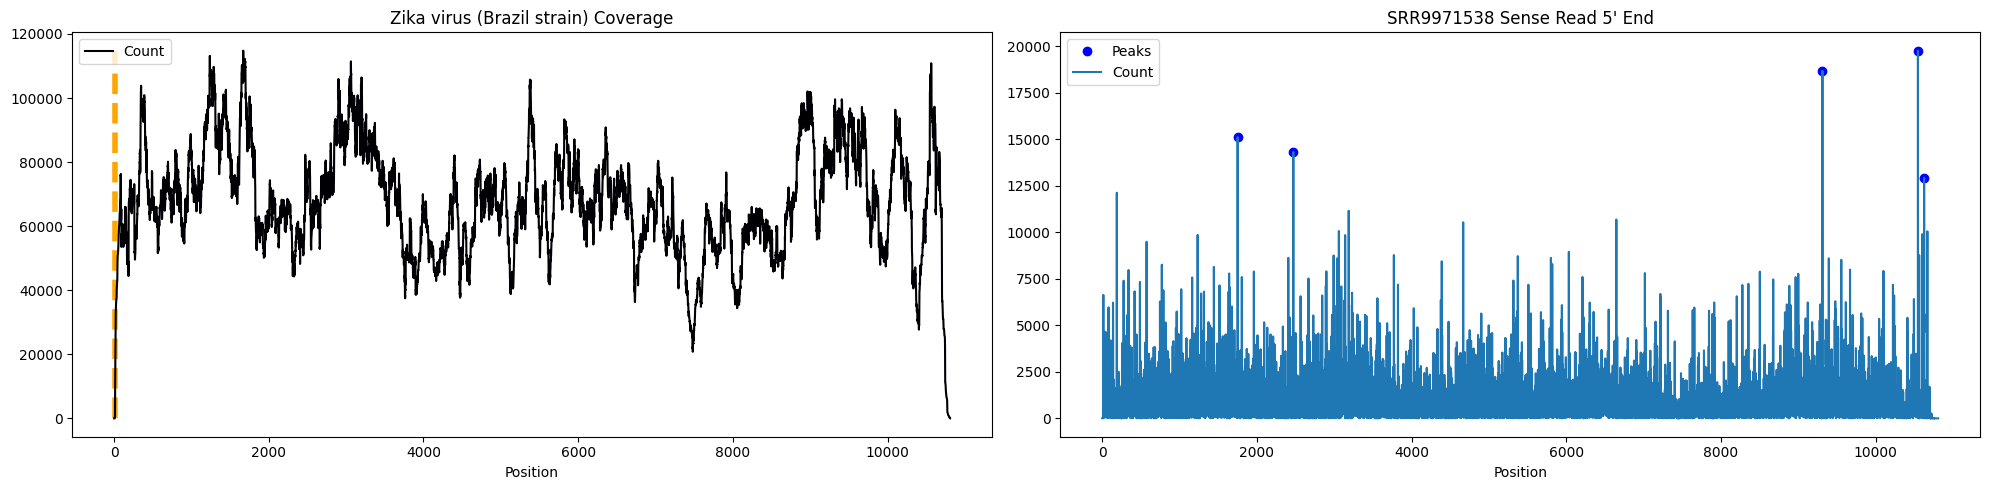

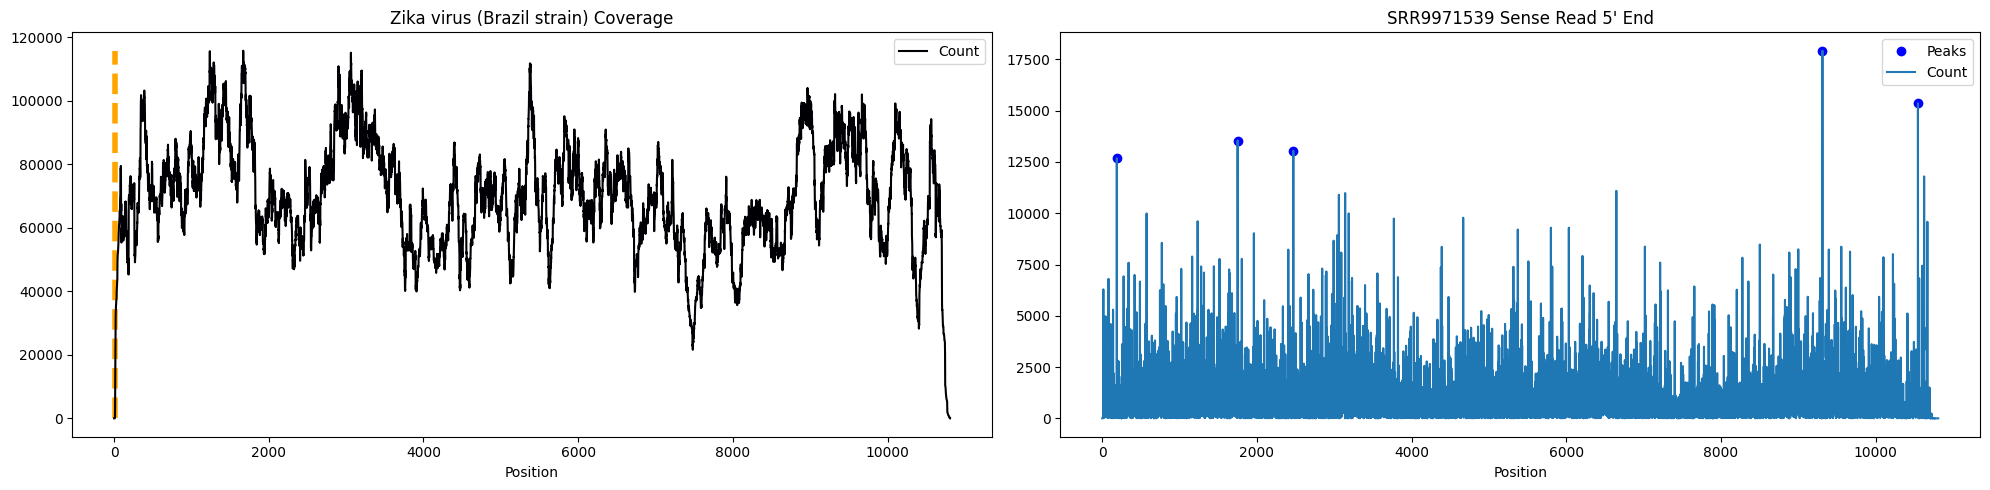

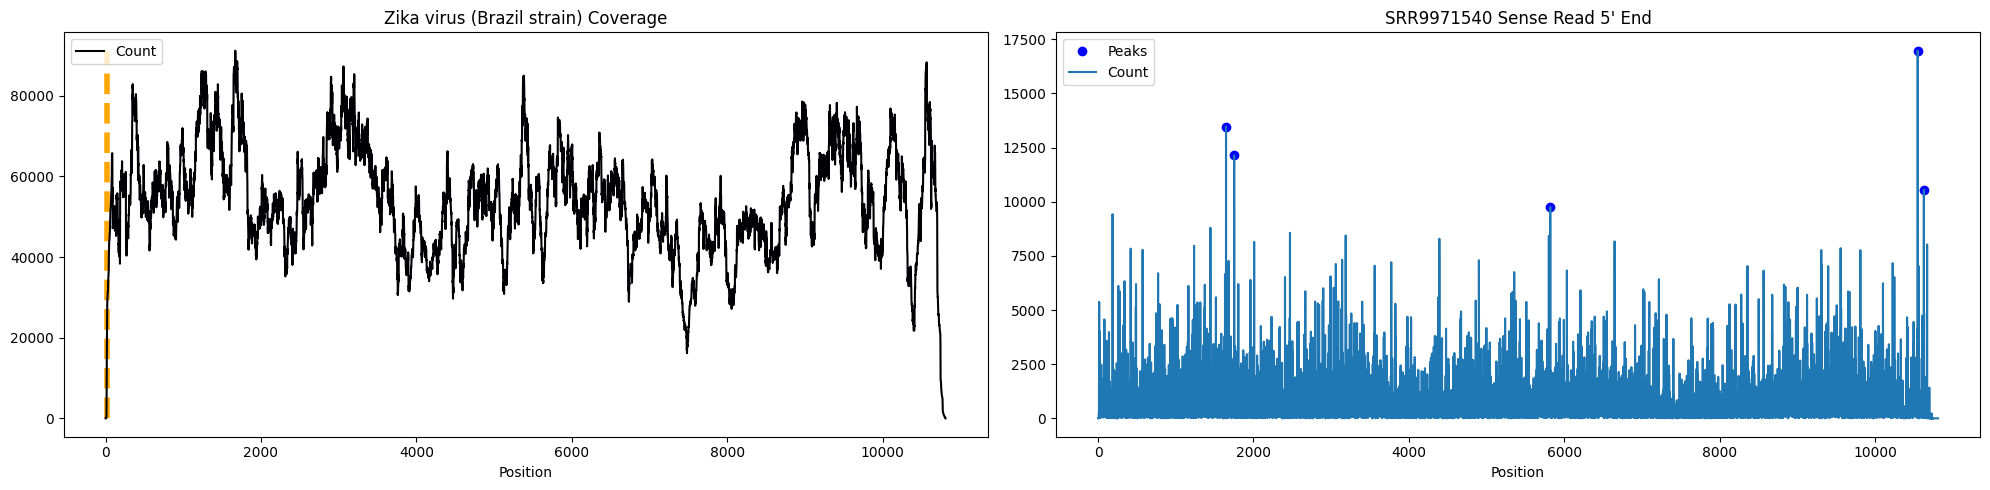

In [8]:
for acc in false_list:
    
    original_depth = pd.read_csv("original_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    # positive_depth = pd.read_csv("positive_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    # negative_depth = pd.read_csv("negative_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    positive_start = pd.read_csv("positive_start/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    # negative_start = pd.read_csv("negative_start/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    # positive_end = pd.read_csv("positive_end/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    # negative_end = pd.read_csv("negative_end/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    
    
    #5' start peak detection
    positive_start2 = pd.read_csv("positive_start/" + acc + ".tsv", sep="\t", names=["Position", "Count"])
    positive_start2 = positive_start2.sort_values(by=['Count'],ascending=False)
    top5peaks = positive_start2.head(5)
    top5peaks = top5peaks.to_numpy()

    #Read coverage Change Point Detection
    depth = pd.read_csv("original_depth/" + acc + ".tsv", sep="\t", names=["Virus", "Position", "Count"])
    depth = depth.drop(columns=["Virus"])
    depth.set_index("Position", inplace=True)

    coverage = depth['Count'].values.reshape(-1,1)
    algo = rpt.Window(model="l2",width=30)
    algo.fit(coverage)
    result = algo.predict(n_bkps=1)
    
    
    # Create a list of the dataframes for easy iteration
    dataframes = [original_depth, positive_start]
    titles = [reference_virus[acc] + " Coverage", acc + " Sense Read 5\' End"]
    colours = ["magma",None]
    
    
    
    # Create subplots: 4 rows and 2 columns, but only using the first slot for a single graph
    fig = plt.figure()
    axs = []
    gs = gridspec.GridSpec(1, 2)
    axs.append(plt.subplot(gs[0, 0]))
    # axs.append(plt.subplot(gs[1, 0]))
    # axs.append(plt.subplot(gs[1, 1]))
    # axs.append(plt.subplot(gs[2, 0]))
    # axs.append(plt.subplot(gs[2, 1]))
    # axs.append(plt.subplot(gs[3, 0]))
    # axs.append(plt.subplot(gs[3, 1]))
    axs.append(plt.subplot(gs[0, 1]))
    
    # Plot each DataFrame on its corresponding subplot
    for i, df in enumerate(dataframes):
        ax = axs[i]
        if i==1:
            ax.plot(top5peaks[0][0],top5peaks[0][1], "ob")
            ax.plot(top5peaks[1][0],top5peaks[1][1], "ob")
            ax.plot(top5peaks[2][0],top5peaks[2][1], "ob")
            ax.plot(top5peaks[3][0],top5peaks[3][1], "ob")
            ax.plot(top5peaks[4][0],top5peaks[4][1], "ob")
            ax.legend(['Peaks'])
        if i==0:
            ax.vlines(result[0],ymin=0,ymax=df['Count'].max(), color='orange', linestyles='dashed', linewidth = 4)
            
        df.plot("Position", "Count", ax=ax, colormap=colours[i], figsize=(20, 5))
        ax.set_title(titles[i])

    # axs[7].annotate("Genome Map", (0.22,0.45), fontsize=50, bbox=dict(boxstyle="round", fc="0.8"))

    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    # fig.savefig('/mnt/Zika_subgenomic_plotting/final_plots/' + acc + '.png')